In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.metrics import  classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

%matplotlib inline 

In [2]:
import importlib
import ids_common
importlib.reload(ids_common)

<module 'ids_common' from 'd:\\stuff\\univ\\ids\\ids_common.py'>

In [3]:
SEED = random.randint(0, 42424242)
SEED = 42
print(f'SEED = {SEED}')

SEED = 42


In [4]:
df_orig = pd.read_csv('./sampled_data/sample_1/clean_dataset.csv', low_memory=False)

In [5]:
df_train_global, df_test_global = ids_common.ds_split(df_orig, test_size=0.9, seed=42)

print(f'df_train_global={df_train_global.shape}')
print(f'df_test_global={df_test_global.shape}')

df_train_global=(336894, 61)
df_test_global=(3032048, 61)


In [117]:
models = [(LogisticRegression(max_iter=1000),
                {    
                    # 'solver': ['sag', 'saga', 'newton-cholesky'],
                    'penalty': ['l2', None],
                    'C': [0.1, 1, 10]
                }) 
           ]


# models = [
#     (DecisionTreeClassifier(random_state=SEED),
#         {
#             'criterion':['gini','entropy', 'log_loss'],
#             'max_depth':[8,16,32,64,128]
#         }
#     )
# ]



In [6]:
# X_train_detection, X_test_detection, y_train_detection, y_test_detection = ids_common.ds_detection_split(df_train_global, seed=SEED)
# print(f'X_train_detection={X_train_detection.shape} y_train_detection={y_train_detection.shape}')
# print(f'X_test_detection={X_test_detection.shape}   y_test_detection={y_test_detection.shape}')

X_train, y_train = ids_common.get_X_y(df_train_global, ids_common.target_label_2_class)
X_test, y_test = ids_common.get_X_y(df_test_global, ids_common.target_label_2_class)

print(f'X_train={X_train.shape}   y_train={y_train.shape}')
print(f'X_test={X_test.shape}   y_test={y_train.shape}')

X_train=(336894, 59)   y_train=(336894,)
X_test=(3032048, 59)   y_test=(336894,)


In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA


# kbest_chi2 = SelectKBest(chi2, k=20).fit(X_train, y_train)
# kbest_anova = SelectKBest(f_classif, k=20).fit(X_train, y_train)

# print(f'X_train_best={X_train_scaled.shape}   y_train={X_train_scaled.shape}')
# kbest_anova = SelectKBest(f_classif, k=20).fit(X_train, y_train)

In [107]:
# X_proc = X_test

# pipe = Pipeline([
#         ('scale', StandardScaler()),
#         # ('ksest', SelectKBest(f_classif, k=10)),
#         # ('reduce_dims', PCA(n_components=10)),
#         ])

# X_proc = pipe.fit_transform(X_test, y_test)


In [119]:

for model, params in models:
    mname = model.__class__.__name__

    print(f'{mname}:')
    for pname, pvals in params.items():
        print(f'\t{pname}: {pvals}')

    grid_search = GridSearchCV(model, params, cv=2, verbose=3)

    grid_search.fit(X_train, y_train)

    print('[GS] Tuned:')
    print('[GS] Score:', grid_search.best_score_)
    print('[GS] Parms: ', grid_search.best_params_)
    print('[GS] Estimator:', grid_search.best_estimator_)

    print('-'*80)

LogisticRegression:
	penalty: ['l2', None]
	C: [0.1, 1, 10]
Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END .................C=0.1, penalty=l2;, score=0.847 total time=   3.2s
[CV 2/2] END .................C=0.1, penalty=l2;, score=0.799 total time=   1.9s


c:\Users\pro17\anaconda3\envs\ids\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END ...............C=0.1, penalty=None;, score=0.799 total time=   2.4s


c:\Users\pro17\anaconda3\envs\ids\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END ...............C=0.1, penalty=None;, score=0.799 total time=   1.8s
[CV 1/2] END ...................C=1, penalty=l2;, score=0.846 total time=   3.7s
[CV 2/2] END ...................C=1, penalty=l2;, score=0.843 total time=   3.6s
[CV 1/2] END .................C=1, penalty=None;, score=0.799 total time=   2.4s
[CV 2/2] END .................C=1, penalty=None;, score=0.799 total time=   1.8s
[CV 1/2] END ..................C=10, penalty=l2;, score=0.847 total time=   3.1s
[CV 2/2] END ..................C=10, penalty=l2;, score=0.847 total time=   3.4s


c:\Users\pro17\anaconda3\envs\ids\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/2] END ................C=10, penalty=None;, score=0.799 total time=   2.4s


c:\Users\pro17\anaconda3\envs\ids\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/2] END ................C=10, penalty=None;, score=0.799 total time=   1.8s
[GS] Tuned:
[GS] Parms:  {'C': 10, 'penalty': 'l2'}
[GS] Score: 0.8466817455935696
--------------------------------------------------------------------------------


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC



In [ ]:
ada = AdaBoostClassifier(algorithm="SAMME", random_state=42)
ada.fit(X_train, y_train)

In [8]:
# gauss = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)
# gauss.fit(X_train, y_train)


svc = SVC(gamma=2, C=1, random_state=42)
svc.fit(X_train, y_train)

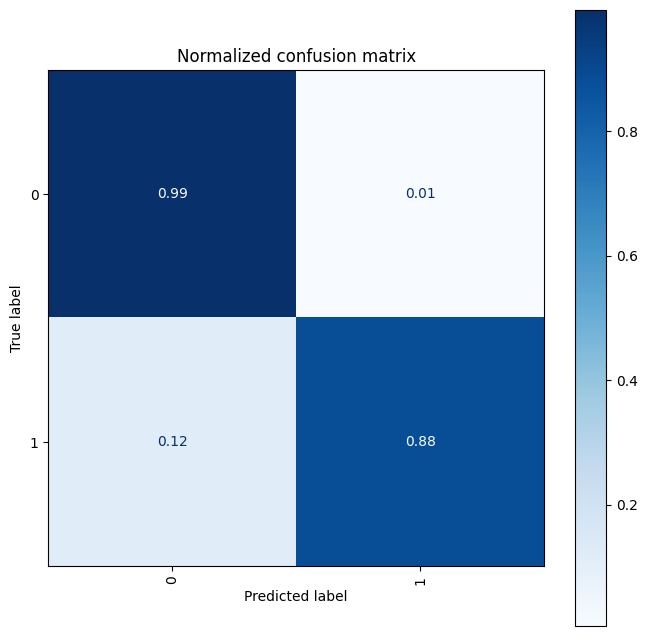

In [128]:
ids_common.plot_cm(y_true=y_train, y_predict=ada.predict(X_train))

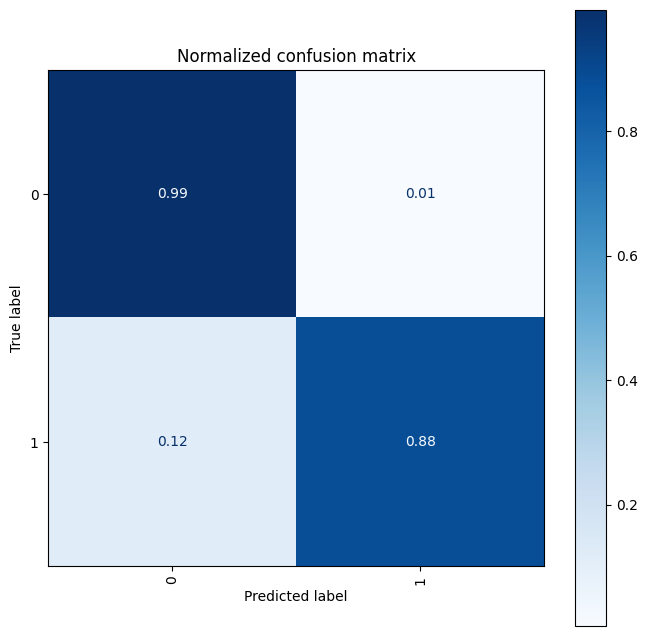

In [129]:
ids_common.plot_cm(y_true=y_test, y_predict=ada.predict(X_test))

In [109]:
dt = DecisionTreeClassifier(random_state=SEED, **{'criterion': 'gini', 'max_depth': 32})

In [112]:
dt.fit(pipe.transform(X_test), y_test)

DecisionTreeClassifier(max_depth=32, random_state=42)

In [113]:
dt.score(pipe.transform(X_test), y_test)

0.9646863266002761

In [114]:
dt.score(pipe.transform(X_train), y_train)

0.9565174946166731

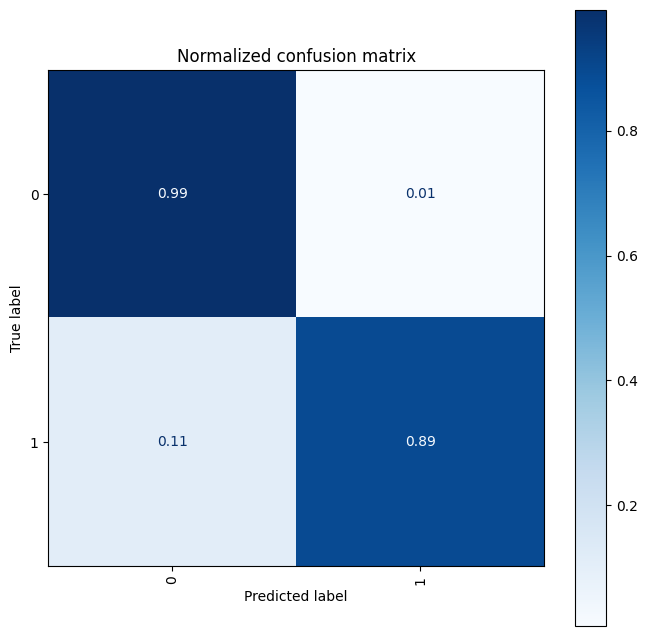

In [115]:
ids_common.plot_cm(y_true=y_train, y_predict=dt.predict(pipe.transform(X_train)))

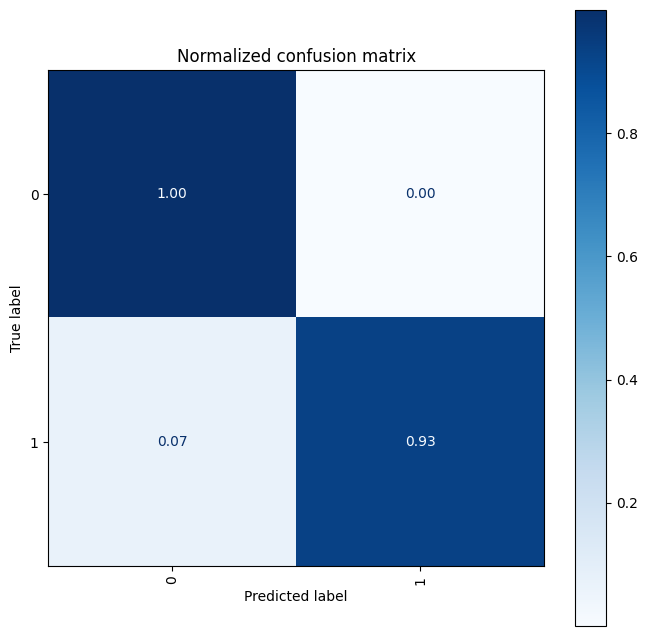

In [106]:
ids_common.plot_cm(y_true=y_train, y_predict=dt.predict(X_train))